In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  786M  100  786M    0     0  2045k      0  0:06:33  0:06:33  0:00:01 1239k2k      0  0:03:51  0:00:05  0:03:46 4470k 3358k      0  0:03:59  0:00:11  0:03:48 2931k    0  0:04:36  0:00:25  0:04:11 4897k 0     0  2869k      0  0:04:40  0:00:28  0:04:12 3442k 0:00:57  0:04:37  247k     0  2339k      0  0:05:44  0:01:20  0:04:24 4785k  0  0:06:38  0:02:27  0:04:11 1331k  2106k      0  0:06:22  0:03:04  0:03:18 3370k12  0:03:05 1736k041k      0  0:06:34  0:03:21  0:03:13     00     0  1935k      0  0:06:56  0:04:03  0:02:53 51062    0  1915k      0  0:07:00  0:04:20  0:02:40 4603k4k     0  1919k      0  0:06:59  0:04:35  0:02:24 1776k   0     0  1951k      0  0:06:52  0:04:38  0:02:14 4681k 0:06:53  0:04:46  0:02:07 2481k  2008k      0  0:06:40  0:04:57  0:01:43 3825k 1989k      0  0:06:44  0:05:01  0:01:43  646k  0  1987k      0  0

In [4]:
!unzip -q kagglecatsanddogs_3367a.zip
!ls

Deep Learning first project.ipynb kagglecatsanddogs_3367a.zip
MSR-LA - 3467.docx                pima-indians-diabetes.csv
PetImages                         readme[1].txt
image classification.ipynb


In [5]:
!ls PetImages

Cat Dog


In [6]:
import os

num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join("PetImages", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 1590 images


In [7]:
image_size = (180, 180)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 23410 files belonging to 2 classes.
Using 18728 files for training.
Found 23410 files belonging to 2 classes.
Using 4682 files for validation.


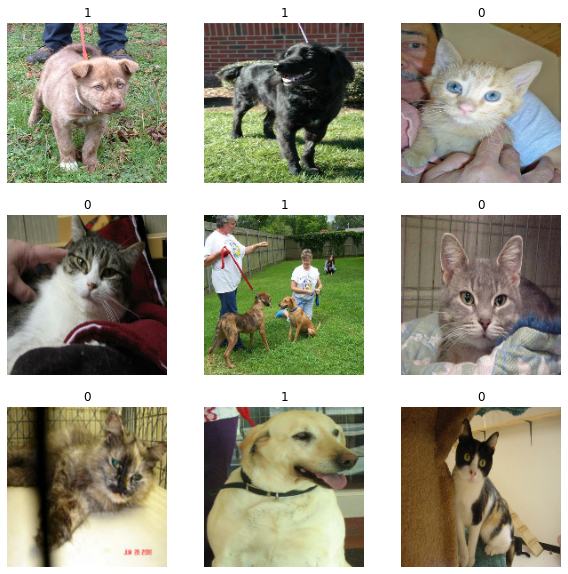

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [9]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

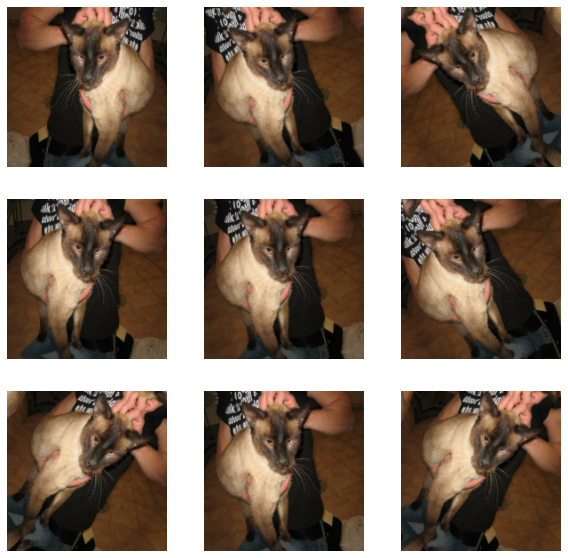

In [10]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [16]:
#input_shape = [180,180]
inputs = keras.Input(shape=input_shape)
x = data_augmentation(inputs)
x = layers.experimental.preprocessing.Rescaling(1./255)(x)
...  # Rest of the model

ValueError: Input 0 of layer random_flip is incompatible with the layer: expected ndim=4, found ndim=3. Full shape received: (None, 180, 180)

In [18]:
augmented_train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

NotImplementedError: in user code:

    <ipython-input-18-38bb168d6719>:1 None  *
        lambda x, y: (data_augmentation(x, training=True), y)
    /Users/kavyakamishupadhyay/miniforge3/envs/python39/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1007 __call__  **
        outputs = call_fn(inputs, *args, **kwargs)
    /Users/kavyakamishupadhyay/miniforge3/envs/python39/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:389 call
        outputs = layer(inputs, **kwargs)
    /Users/kavyakamishupadhyay/miniforge3/envs/python39/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1007 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /Users/kavyakamishupadhyay/miniforge3/envs/python39/lib/python3.8/site-packages/tensorflow/python/keras/layers/preprocessing/image_preprocessing.py:866 call
        output = control_flow_util.smart_cond(training, random_rotated_inputs,
    /Users/kavyakamishupadhyay/miniforge3/envs/python39/lib/python3.8/site-packages/tensorflow/python/keras/utils/control_flow_util.py:114 smart_cond
        return smart_module.smart_cond(
    /Users/kavyakamishupadhyay/miniforge3/envs/python39/lib/python3.8/site-packages/tensorflow/python/framework/smart_cond.py:54 smart_cond
        return true_fn()
    /Users/kavyakamishupadhyay/miniforge3/envs/python39/lib/python3.8/site-packages/tensorflow/python/keras/layers/preprocessing/image_preprocessing.py:861 random_rotated_inputs
        get_rotation_matrix(angles, img_hd, img_wd),
    /Users/kavyakamishupadhyay/miniforge3/envs/python39/lib/python3.8/site-packages/tensorflow/python/keras/layers/preprocessing/image_preprocessing.py:757 get_rotation_matrix
        array_ops.zeros((num_angles, 2), dtypes.float32),
    /Users/kavyakamishupadhyay/miniforge3/envs/python39/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /Users/kavyakamishupadhyay/miniforge3/envs/python39/lib/python3.8/site-packages/tensorflow/python/ops/array_ops.py:2819 wrapped
        tensor = fun(*args, **kwargs)
    /Users/kavyakamishupadhyay/miniforge3/envs/python39/lib/python3.8/site-packages/tensorflow/python/ops/array_ops.py:2868 zeros
        output = _constant_if_small(zero, shape, dtype, name)
    /Users/kavyakamishupadhyay/miniforge3/envs/python39/lib/python3.8/site-packages/tensorflow/python/ops/array_ops.py:2804 _constant_if_small
        if np.prod(shape) < 1000:
    <__array_function__ internals>:5 prod
        
    /Users/kavyakamishupadhyay/miniforge3/envs/python39/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3030 prod
        return _wrapreduction(a, np.multiply, 'prod', axis, dtype, out,
    /Users/kavyakamishupadhyay/miniforge3/envs/python39/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87 _wrapreduction
        return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
    /Users/kavyakamishupadhyay/miniforge3/envs/python39/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:852 __array__
        raise NotImplementedError(

    NotImplementedError: Cannot convert a symbolic Tensor (sequential/random_rotation/rotation_matrix/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported
